# Taiwanese stock volatility and normal distribution

In [2]:
import datetime as dt
dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

'2016-10-17 21:02:21'

In [3]:
cd ~/Development/pytwstock/

/home/zhxie/Development/pytwstock


In [4]:
%matplotlib inline
from twstock.twstockdb.TWStockDatabase import TWSECDB
twdb = TWSECDB("/d/StockDatabase/twsecdb.scdb")

In [5]:
stock_list = twdb.get_stock_list(stock_type='PO')
stock_list = [x[0] for x in stock_list]

In [6]:
import datetime as dt
total_foreign_shares = None
total_foreign_equitity = None
for stock_no in stock_list:
    f = twdb.query_taiwan_stock_foreign_holdings_time_series(stock_no)
    f = f['foreign_china_hold']
    f = f.fillna(0)
    prices = twdb.query_taiwan_stock_ohlcv_time_series(stock_no, from_date=dt.date(2004,2,11))
    close_price = prices['close']
    close_price = close_price.fillna(0)
    e = f*close_price
    if total_foreign_shares is None:
        total_foreign_shares = f
    else:
        total_foreign_shares = total_foreign_shares.add(f, fill_value=0)
    if total_foreign_equitity is None:
        total_foreign_equitity = e
    else:
        total_foreign_equitity = total_foreign_equitity.add(e, fill_value=0)

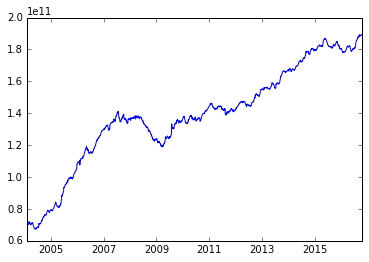

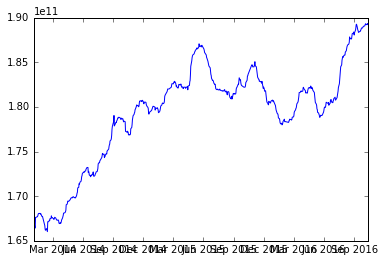

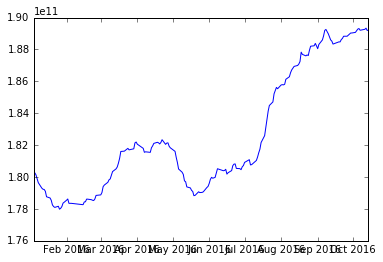

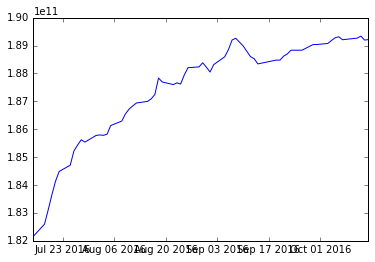

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(total_foreign_shares)
plt.figure()
plt.cla()
plt.plot(total_foreign_shares.ix[dt.date(2014,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_shares.ix[dt.date(2016,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_shares.ix[-62:])

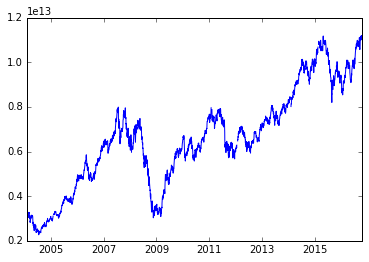

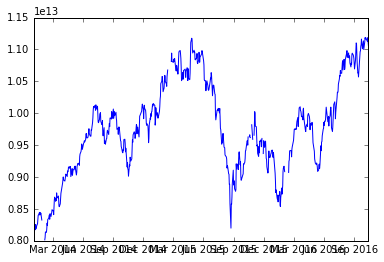

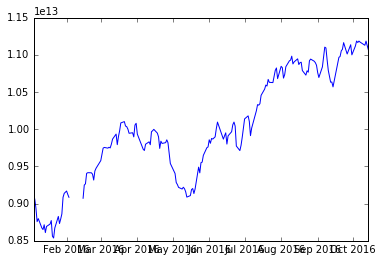

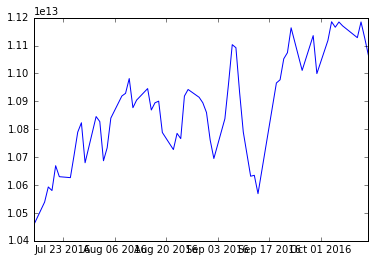

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(total_foreign_equitity)
plt.figure()
plt.cla()
plt.plot(total_foreign_equitity.ix[dt.date(2014,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_equitity.ix[dt.date(2016,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_equitity.ix[-62:])

In [28]:
tmp = total_foreign_shares.shift(1)
shift_foreign_shares = tmp.ix[1:]
foreign_shares_volatility = (total_foreign_shares.add(shift_foreign_shares*-1, fill_value=0))/total_foreign_shares
foreign_shares_volatility = foreign_shares_volatility.ix[1:]

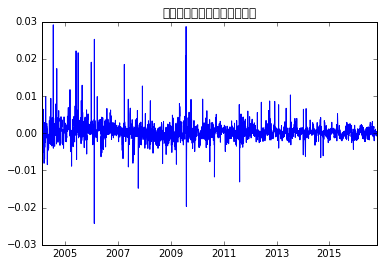

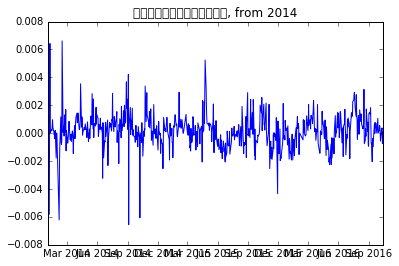

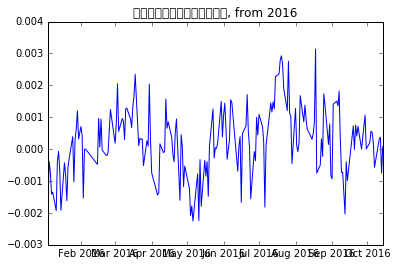

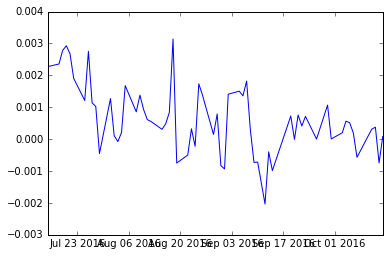

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(foreign_shares_volatility)
plt.title("外資持股相對前一天增減比例")
plt.figure()
plt.cla()
plt.plot(foreign_shares_volatility.ix[dt.date(2014,1,1):])
plt.title("外資持股相對前一天增減比例, from 2014")
plt.figure()
plt.cla()
plt.plot(foreign_shares_volatility.ix[dt.date(2016,1,1):])
plt.title("外資持股相對前一天增減比例, from 2016")
plt.figure()
plt.cla()
plt.plot(foreign_shares_volatility.ix[-62:])

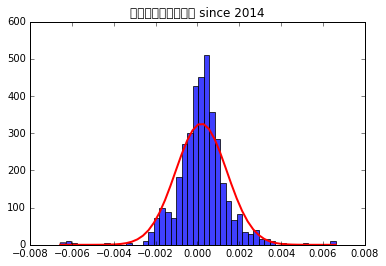

NormaltestResult(statistic=101.15093150913836, pvalue=1.0848115565399129e-22)

In [30]:
import matplotlib.mlab as mlab
import scipy.stats as stats
n, bins, patches = plt.hist(foreign_shares_volatility.ix[dt.date(2014,1,1):], 50, normed=1, facecolor='blue', alpha=0.75)
sigma = foreign_shares_volatility.ix[dt.date(2014,1,1):].std() 
mu = foreign_shares_volatility.ix[dt.date(2014,1,1):].mean() 
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=2)
plt.title("外資持股變化率分佈 since 2014")
plt.show()
stats.normaltest(foreign_shares_volatility.ix[dt.date(2014,1,1):])

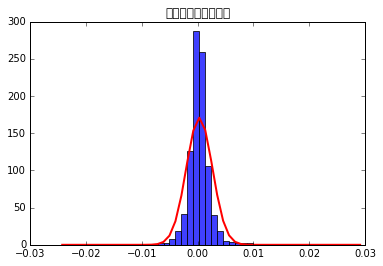

NormaltestResult(statistic=2094.2664348935186, pvalue=0.0)

In [31]:
n, bins, patches = plt.hist(foreign_shares_volatility, 50, normed=1, facecolor='blue', alpha=0.75)
sigma = foreign_shares_volatility.std() 
mu = foreign_shares_volatility.mean() 
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=2)
plt.title("外資持股變化率分佈")
plt.show()
stats.normaltest(foreign_shares_volatility)

In [37]:
tmp = total_foreign_equitity.shift(1)
shifted_foreign_equitity = tmp.ix[1:]
foreign_equitity_volatility = (total_foreign_equitity.add(shifted_foreign_equitity*-1))/total_foreign_equitity
foreign_equitity_volatility = foreign_equitity_volatility.fillna(0)

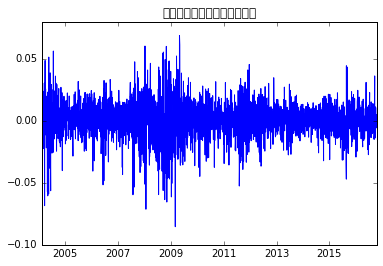

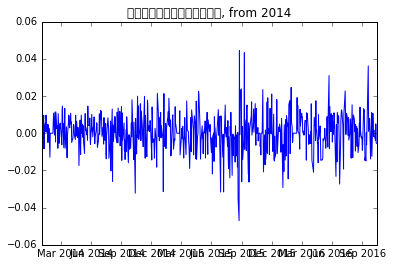

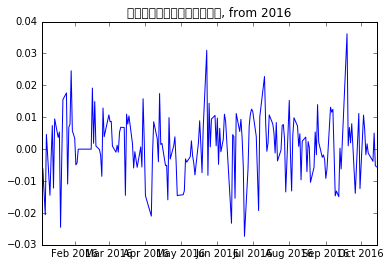

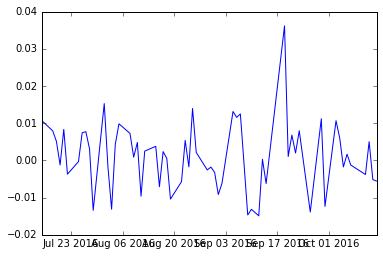

In [38]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(foreign_equitity_volatility)
plt.title("外資淨值相對前一天增減比例")
plt.figure()
plt.cla()
plt.plot(foreign_equitity_volatility.ix[dt.date(2014,1,1):])
plt.title("外資淨值相對前一天增減比例, from 2014")
plt.figure()
plt.cla()
plt.plot(foreign_equitity_volatility.ix[dt.date(2016,1,1):])
plt.title("外資淨值相對前一天增減比例, from 2016")
plt.figure()
plt.cla()
plt.plot(foreign_equitity_volatility.ix[-62:])

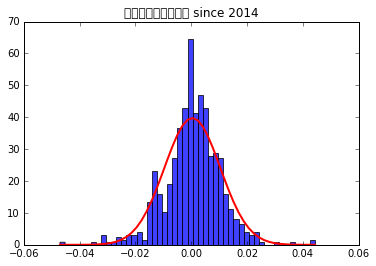

NormaltestResult(statistic=43.313041175406823, pvalue=3.9327162395176946e-10)

In [39]:
foreign_equitity_volatility = foreign_equitity_volatility.fillna(0)
n, bins, patches = plt.hist(foreign_equitity_volatility.ix[dt.date(2014,1,1):], 50, normed=1, facecolor='blue', alpha=0.75)
sigma = foreign_equitity_volatility.ix[dt.date(2014,1,1):].std() 
mu = foreign_equitity_volatility.ix[dt.date(2014,1,1):].mean() 
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=2)
plt.title("外資持股變化率分佈 since 2014")
plt.show()
stats.normaltest(foreign_equitity_volatility.ix[dt.date(2014,1,1):])

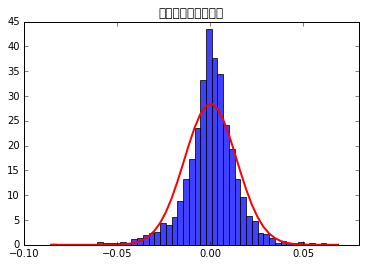

NormaltestResult(statistic=348.96749780265759, pvalue=1.6698238907357675e-76)

In [40]:
foreign_equitity_volatility = foreign_equitity_volatility.fillna(0)
n, bins, patches = plt.hist(foreign_equitity_volatility, 50, normed=1, facecolor='blue', alpha=0.75)
sigma = foreign_equitity_volatility.std() 
mu = foreign_equitity_volatility.mean() 
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=2)
plt.title("外資持股變化率分佈")
plt.show()
stats.normaltest(foreign_equitity_volatility)